This notebook compares all models and graphs them to see which has the lowest RSME

# Import Packages and Data

In [33]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
simple_mean = pd.read_csv('model_one.csv')
simple_mean = model1.dropna()

In [36]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean = pd.read_csv('model_two.csv')
weighted_mean = model2.dropna()

In [38]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean_with_pa = pd.read_csv('model_three.csv')
weighted_mean_with_pa = model3.dropna()

In [40]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean_with_pa_regress_to_mean = pd.read_csv('model_four.csv')
weighted_mean_with_pa_regress_to_mean = model4.dropna()

In [42]:
# Import model1 projections drop rows with empty data (rookies, second, third, and 2025 seasons)
lasso = pd.read_csv('model_five.csv')
lasso = model5.dropna()

In [44]:
#Formula to caluculate RSME
def calculate_rsme(dataframe, value):
    dataframe['Error'] = dataframe[value] - dataframe[f"Projected_{value}"]
    dataframe['Squared_Error'] = dataframe['Error'] ** 2
    overall_rsme = np.sqrt(dataframe['Squared_Error'].mean())
    return overall_rsme

In [45]:
non_pa_list = ['G', 'AB', 'PA', 'AVG', 'BB%', 'OBP', 'SLG', 'OPS', 'ISO', 'wOBA', 'wRAA', 'wRC+', 'BB%+']
pa_list = ['H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SH', 'SB', 'L-WAR', 'wRC', 'WAR']
filtered_list = pa_list + non_pa_list

In [46]:
simple_mean = {}
for col in filtered_list:
    dict1[col] = calculate_rsme(simple_mean, col)

In [47]:
weighted_mean = {}
for col in filtered_list:
    dict2[col] = calculate_rsme(weighted_mean, col)

In [48]:
weighted_mean_with_pa = {}
for col in filtered_list:
    dict3[col] = calculate_rsme(weighted_mean_with_pa, col)

In [49]:
weighted_mean_with_pa_regress_to_mean = {}
for col in filtered_list:
    dict4[col] = calculate_rsme(weighted_mean_with_pa_regress_to_mean, col)

In [50]:
lasso = {}
for col in filtered_list:
    dict5[col] = calculate_rsme(lasso, col)

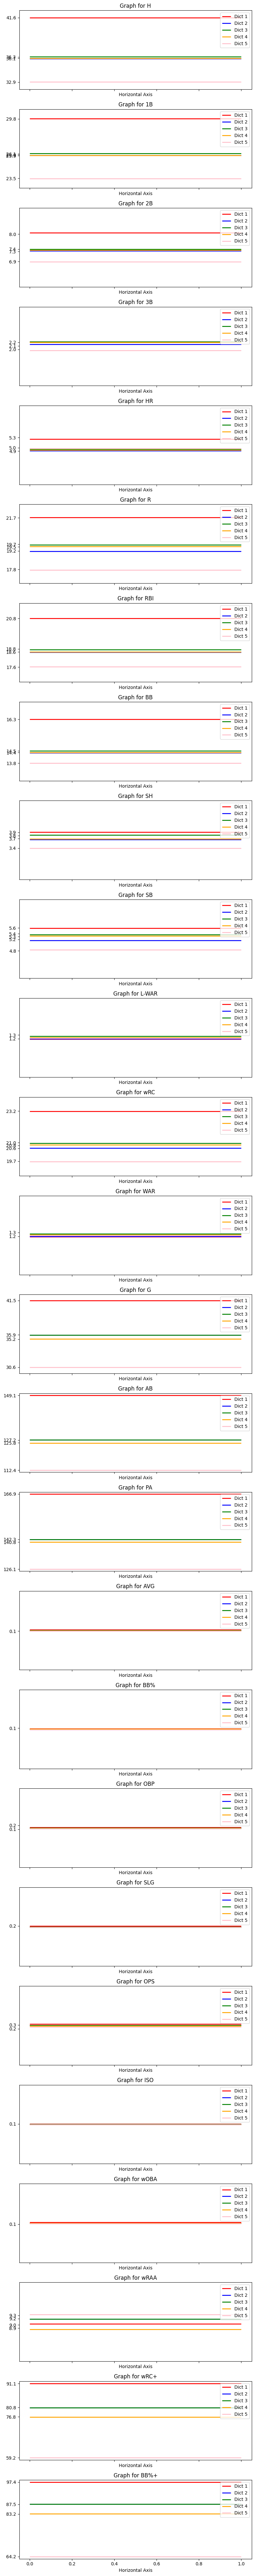

In [51]:
# Combine dictionaries into a list for easier handling
dicts = [simple_mean, weighted_mean, weighted_mean_with_pa, weighted_mean_with_pa_regress_to_mean, lasso]
keys = list(dict1.keys())

# Set up subplots: one per key
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(8, 80), sharex=True)

# Colors for the lines
colors = ['red', 'blue', 'green', 'orange', 'pink']

# Plot data
for ax, key in zip(axes, keys):
    for i, d in enumerate(dicts):
        value = d[key]
        ax.hlines(y=value, xmin=0, xmax=1, colors=colors[i], linewidth=2, label=f'Dict {i+1}')
    ax.set_title(f"Graph for {key}")
    # Adjust y-axis ticks to fit float values
    y_min = min(d[key] for d in dicts) - 1  # Slight padding below the minimum
    y_max = max(d[key] for d in dicts) + 1  # Slight padding above the maximum
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(sorted(set([round(d[key], 1) for d in dicts])))  # Add rounded float ticks
    ax.set_xlabel("Horizontal Axis")
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


